# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Haberman's survival dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Dataset: Haberman Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set]
* There are 4 attribute in this dataset out of which 3 are features and 1 class attribute. 
* There are 306 instances of data.
* Number of nodes
* Age
* Year
* Survival Status
* Objective:To classify a data as belonging to one of the 2 classes(survived more than 5 yrs or not) given the 3 features.
* Which is the most important feature to identify the survival status?


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


heberman_data = pd.read_csv("haberman.csv")
heberman_data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [51]:
# (Q) how many data-points and features?
print (heberman_data.shape)

(306, 4)


In [52]:
#(Q) What are the column names in our dataset?
print (heberman_data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [53]:
#Q High level statistics
heberman_data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [54]:
#(Q) How many data points for each class are present? 

y_value_counts= heberman_data["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#Hebarman dataset is an imbalenced dataset .

print(y_value_counts)

print( )

data_survived = heberman_data.loc[heberman_data["status"] == 1]
data_not_survived = heberman_data.loc[heberman_data["status"] == 2]

print("Number of patients survived more than 5 yrs : ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")
print(data_survived.describe())
print( )
print("Number of patients not survived more than 5 yrs :", y_value_counts[2], ", (", (y_value_counts[2]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")
print(data_not_survived.describe())


#print(data_survived)

print("="*50)
print( )
print("Hebarman dataset is an imbalenced dataset" )
#print(data_not_survived)


1    225
2     81
Name: status, dtype: int64

Number of patients survived more than 5 yrs :  225 , ( 73.52941176470588 %)
              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0

Number of patients not survived more than 5 yrs : 81 , ( 26.47058823529412 %)
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65

**Observation(s):**
1. The mean value of age in the above statistics shows, younger people has a better chance of survival.
2. The mean value of nodes in the above sttistics shows, those who have less number of nodes, has a beter chance of survival
3. From the above its clear that the age and nodes are more useful features which is closely relavent to the status. 
4. Among age and nodes, nodes is the one, which gives better idea about the survival chances

# (3.2) 2-D Scatter Plot

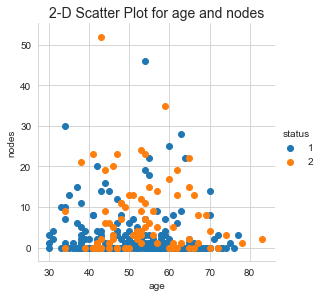

In [91]:
# 2-D Scatter plot with color-coding for each Survival type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(heberman_data, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D Scatter Plot for age and nodes' ,y=1.1, fontsize = 14)
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Seperating Survived and not survived is much harder as they have considerable overlap.


## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

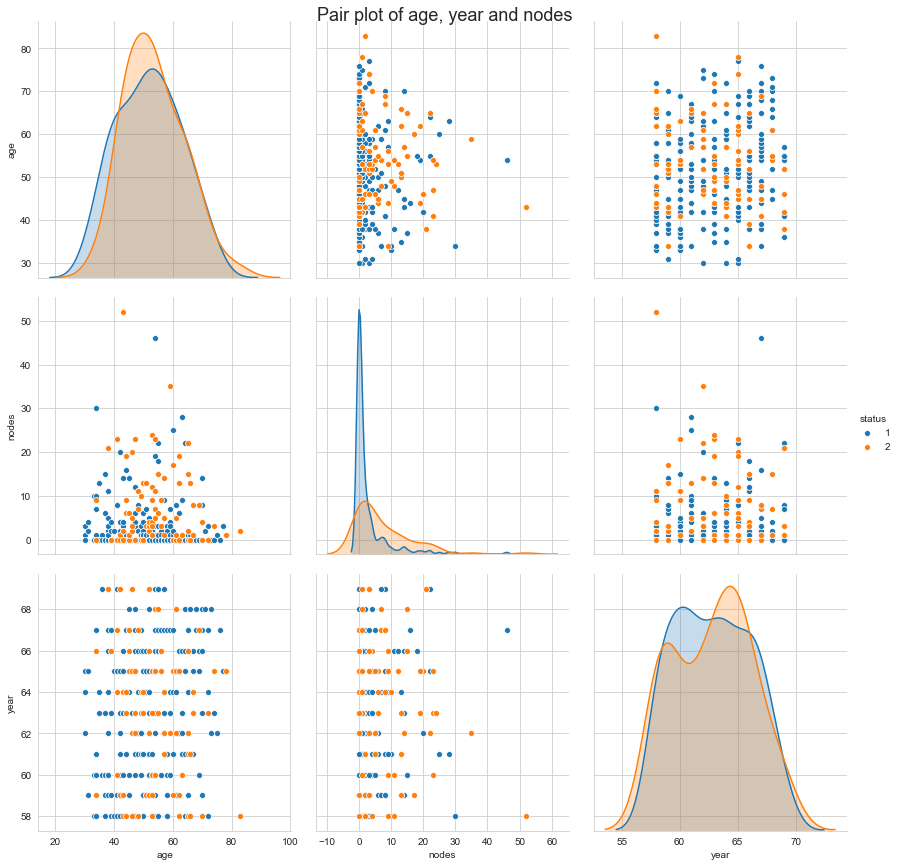

In [111]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(heberman_data, hue="status",vars = ['age', 'nodes','year'], height=4);
plt.suptitle("Pair plot of age, year and nodes" ,y=1.0, fontsize = 18)
plt.show()

# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. patients over 60 yrs and having more than 10 nodes mostly dont survive
2. Chances of survival is higher for patients having 0 nodes irrespective of their age

# (3.4) Histogram, PDF, CDF

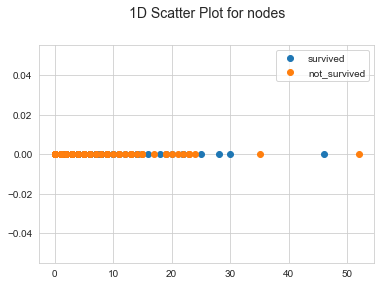

In [92]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of nodes
import numpy as np

data_survived = heberman_data.loc[heberman_data["status"] == 1];
data_not_survived = heberman_data.loc[heberman_data["status"] == 2];

plt.plot(data_survived["nodes"], np.zeros_like(data_survived['nodes']), 'o', label='survived')
plt.legend()
plt.plot(data_not_survived["nodes"], np.zeros_like(data_not_survived['nodes']), 'o',label= 'not_survived')
plt.legend()
plt.title('1D Scatter Plot for nodes',y=1.1, fontsize = 14)
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

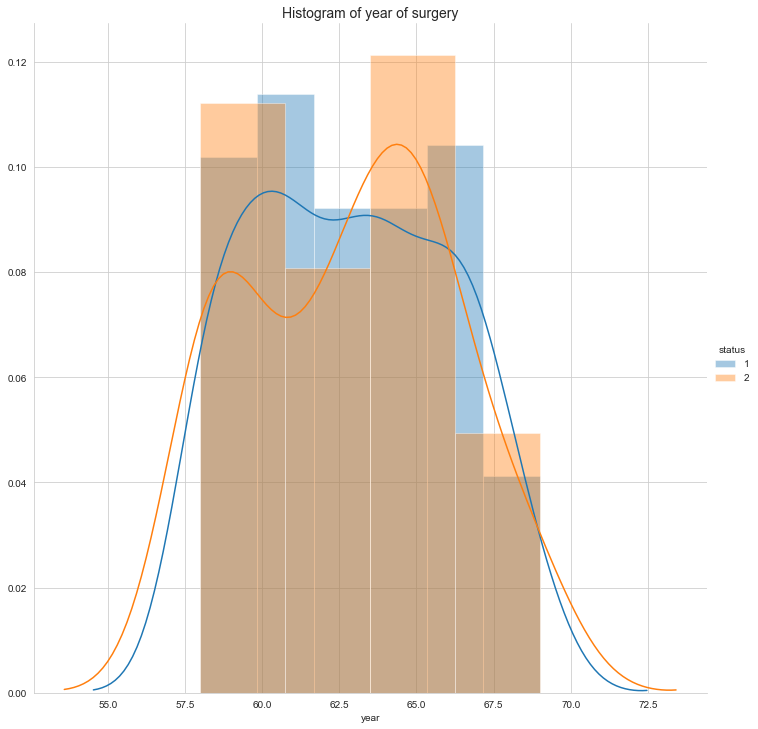

In [94]:
sns.FacetGrid(heberman_data, hue="status", height=10) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of year of surgery',y=1.1, fontsize = 14)
plt.show();


**Observations**
1. Maximum surgeries happened beween 1958 and 1967

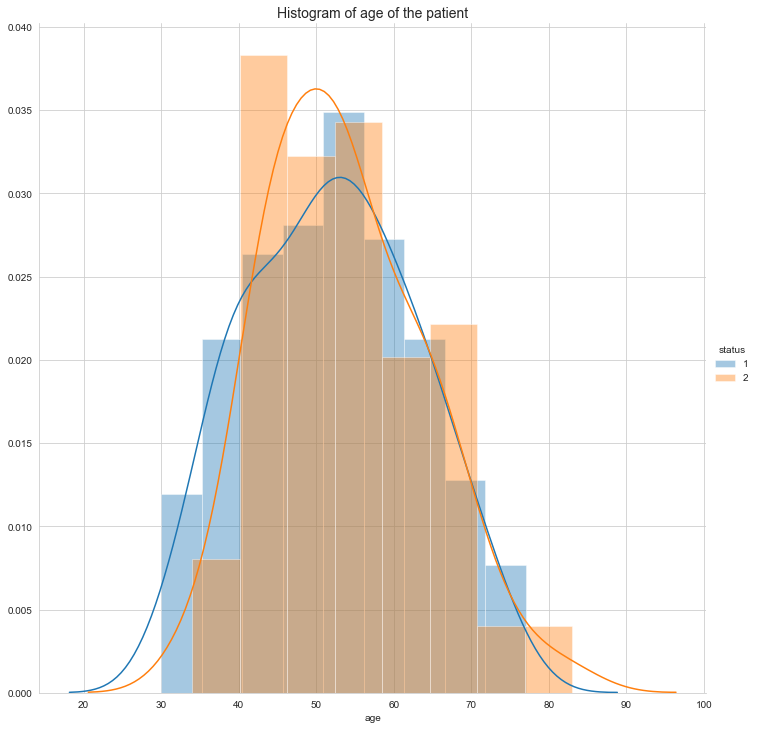

In [95]:
sns.FacetGrid(heberman_data, hue="status", height=10) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of age of the patient',y=1.1, fontsize = 14)
plt.show();

**Observation(s):**
1. The above histogram shows Suvival chance of patients over the age 75 is nil. 
2. The chances of survival is very high, when the patients age is between 30-40

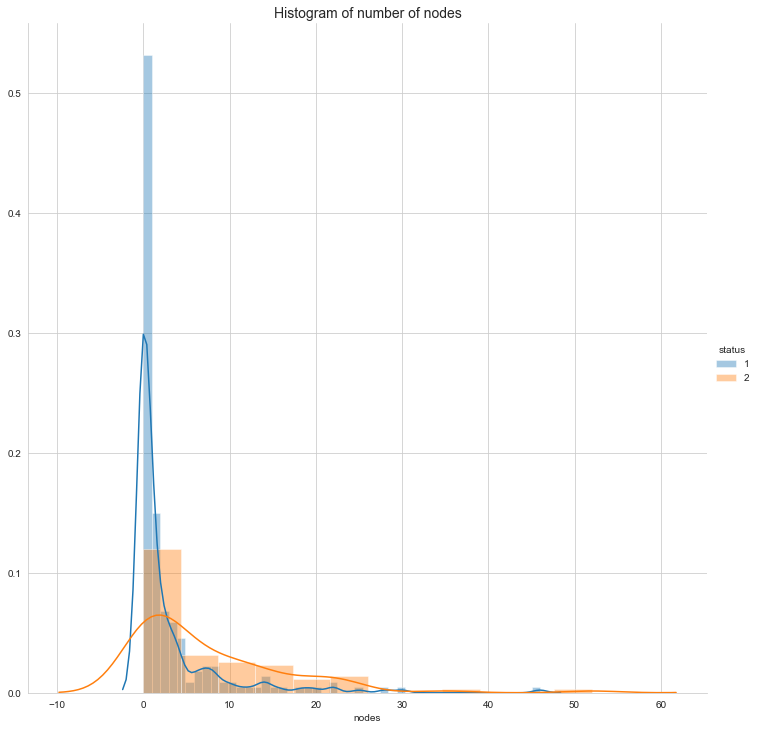

In [96]:
sns.FacetGrid(heberman_data, hue="status", height=10) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of number of nodes',y=1.1, fontsize = 14)
plt.show();

**Observation(s):**
1. In the above histogram, most of the patients who have survived were having nodes in the range of 0-5
2. Higher the number of nodes, the possibility of survival is lesser

In [61]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.

Data Survived
pdf:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin edges:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
cdf:  [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]

Not survived more than 5 yrs
pdf:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf:  [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]



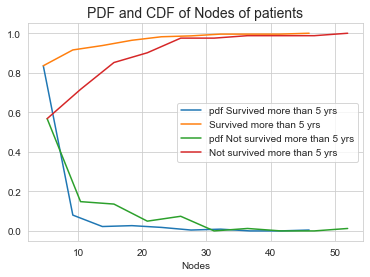

In [107]:
# Plots of CDF of nodes for both the status.

#data_survived
counts1, bin_edges1 = np.histogram(data_survived['nodes'], bins=10, 
                                 density = True)
pdf1 = counts1/(sum(counts1))
print("Data Survived")
print("="*30)
print("pdf: ",pdf1);
print("Bin edges: ",bin_edges1)
cdf1 = np.cumsum(pdf1)
print("cdf: ",cdf1)
plt.plot(bin_edges1[1:],pdf1, label = 'pdf Survived more than 5 yrs')
plt.plot(bin_edges1[1:], cdf1, label = 'Survived more than 5 yrs')
plt.xlabel('Nodes')
plt.legend()

print( )

# data_not_survived
counts2, bin_edges2 = np.histogram(data_not_survived['nodes'], bins=10, 
                                 density = True)
pdf2 = counts2/(sum(counts2))
print("Not survived more than 5 yrs")
print("="*30)
print("pdf: ",pdf2);
print("Bin edges: ",bin_edges2)
cdf2 = np.cumsum(pdf2)
print("cdf: ",cdf2)
print()
plt.plot(bin_edges2[1:],pdf2, label = 'pdf Not survived more than 5 yrs')
plt.plot(bin_edges2[1:], cdf2, label = 'Not survived more than 5 yrs')
plt.xlabel('Nodes')
plt.legend()
plt.title('PDF and CDF of Nodes of patients',y=1.0, fontsize = 14)

plt.show();

Data Survived
pdf:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin edges:  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
cdf:  [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]

Not survived more than 5 yrs
pdf:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin edges:  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
cdf:  [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]



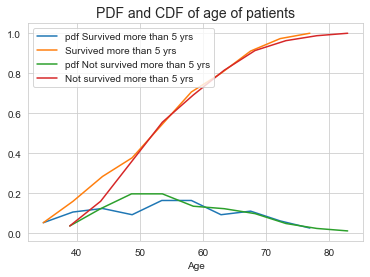

In [108]:
# Plots of CDF of age for both the status.

#data_survived
counts1, bin_edges1 = np.histogram(data_survived['age'], bins=10, 
                                 density = True)
pdf1 = counts1/(sum(counts1))
print("Data Survived")
print("="*30)
print("pdf: ",pdf1);
print("Bin edges: ",bin_edges1)
cdf1 = np.cumsum(pdf1)
print("cdf: ",cdf1)
plt.plot(bin_edges1[1:],pdf1, label = 'pdf Survived more than 5 yrs')
plt.plot(bin_edges1[1:], cdf1, label = 'Survived more than 5 yrs')
plt.xlabel('Age')
plt.legend()

print( )

# data_not_survived
counts2, bin_edges2 = np.histogram(data_not_survived['age'], bins=10, 
                                 density = True)
pdf2 = counts2/(sum(counts2))
print("Not survived more than 5 yrs")
print("="*30)
print("pdf: ",pdf2);
print("Bin edges: ",bin_edges2)
cdf2 = np.cumsum(pdf2)
print("cdf: ",cdf2)
print()
plt.plot(bin_edges2[1:],pdf2, label = 'pdf Not survived more than 5 yrs')
plt.plot(bin_edges2[1:], cdf2, label = 'Not survived more than 5 yrs')
plt.xlabel('Age')
plt.legend()
plt.title('PDF and CDF of age of patients',y=1.0, fontsize = 14)

plt.show();

**Observation(s):**
1. Most of the patients who have survived were having 0 nodes or nodes in the range of 0-5
2. Higher the number of nodes, the possibility of survival is lesser
3. Lesser the age the chances of survival is higher

# (3.7) Box plot and Whiskers

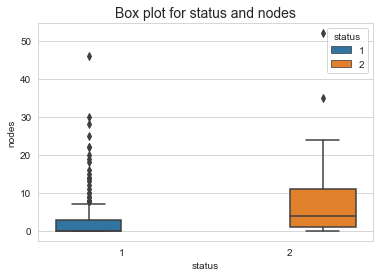

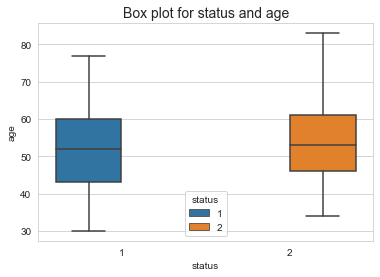

In [109]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

#how to add legend 
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(x='status',y='nodes', hue="status", data=heberman_data)
plt.title("Box plot for status and nodes",y=1.0, fontsize = 14)
plt.show()

print()

sns.boxplot(x='status',y='age', hue="status", data=heberman_data)
plt.title("Box plot for status and age",y=1.0, fontsize = 14)
plt.show()



**Observation(s):**
1. Higher the number of nodes, the possibility of survival is lesser
2. Patients having 2-24 nodes are less likely to survive
3. The box plot shows, range of nodes for those not survived is between 2-24, the same is between 0-8 for those survived

# (3.8) Violin plots

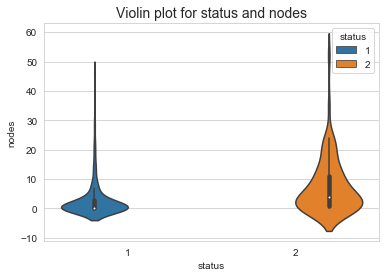

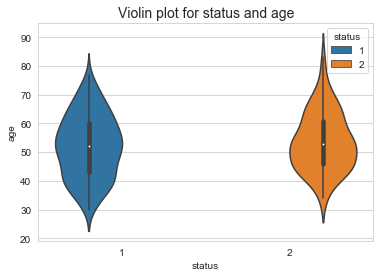

In [110]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", hue="status", data=heberman_data, size=8)
plt.title("Violin plot for status and nodes",y=1.0, fontsize = 14)
plt.show()


print()
sns.violinplot(x="status", y="age",hue="status", data=heberman_data, size=8)
plt.title("Violin plot for status and age",y=1.0, fontsize = 14)
plt.show()


**Observation(s):**
1. The violin plot shows,for most of patients who survived had 0 nodes. 

# (3.9) Summarizing plots in english
* Explain your findings/conclusions in plain english

1) Nodes and age the most important features to find the survival chances  
2) Chances for survival for those within the age 30-40 is high and chances of survival of those above 75 are nil  
3) Chances for survival for those with 0 nodes is high in the age group of 30-75  
4) Chances for survival for those with 1-23 nodes is less, especially for those over 45 yrs of age  
5) Higher the age (above 40)  and higher the number of nodes (more than 1) the chances of survival is very less  
6) Including more features will give better info about survival status

# (3.11) Multivariate probability density, contour plot.


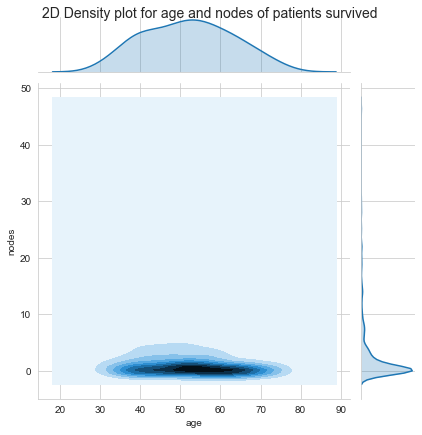

In [87]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=data_survived, kind="kde");
plt.suptitle("2D Density plot for age and nodes of patients survived",y=1.0, fontsize = 14)
plt.show();


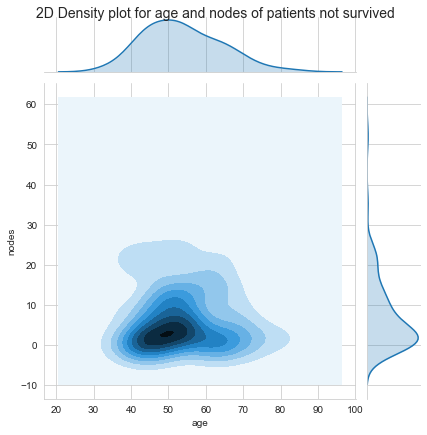

In [86]:
sns.jointplot(x="age", y="nodes", data=data_not_survived, kind="kde");
plt.suptitle("2D Density plot for age and nodes of patients not survived",y=1.0, fontsize = 14)
plt.show();

Observation(s):
As age increases and number of node increases, the survival chance is lesser

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [68]:
data_survived_SW = data_survived.iloc[:,1]
data_not_survived_SW = data_not_survived.iloc[:,1]


In [69]:
from scipy import stats
stats.ks_2samp(data_survived_SW, data_not_survived_SW)


Ks_2sampResult(statistic=0.07259259259259257, pvalue=0.9013727258134205)

In [70]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.22279069490777847, pvalue=0.6464213787324788)

In [71]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


KstestResult(statistic=0.1527074485919122, pvalue=0.01678660520185983)

In [72]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')


KstestResult(statistic=0.08339560233786897, pvalue=1.6901488330719827e-06)

**Conclusion**  
1) Nodes and age the most important features to find the survival status  
2) Chances for survival for patients within the age 30-40 is high and chances of survival of those above 75 is nil  
3) Chances for survival for patients with 0 nodes is high in the age group of 30-75  
4) Chances for survival for those with 1-23 nodes is less, especially for those over 45 yrs of age  
5) Higher the age (above 40)  and higher the number of nodes (more than 1) the chances of survival is very less  
6) Most number of surgeries happened between the year 1958 and 1967. And the feature year is not giving meaning information to find the status  
7) Including more features will give better info about survival status  